# Fake News Detection
Fake news detection using machine learning is an area of active research and development. Machine learning models can be trained to analyze text, source credibility, and other features to determine the likelihood of a news article being fake.

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import re
import string

## Importing Dataset

In [3]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Inserting a column "class" as target feature

In [6]:
df_fake["class"] = 0
df_true["class"] = 1

In [7]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [8]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [9]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [10]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

In [11]:
df_fake_manual_testing.head()

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [12]:
df_true_manual_testing.head()

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [13]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

## Merging True and Fake Dataframes

In [14]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [15]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [16]:
df=df_merge

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44878 entries, 0 to 21406
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44878 non-null  object
 1   text     44878 non-null  object
 2   subject  44878 non-null  object
 3   date     44878 non-null  object
 4   class    44878 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [18]:
df.describe(include="object")

,title,text,subject,date
count,44878,44878,44878,44878
unique,38721,38637,8,2397
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017"
freq,14,627,11272,182


In [19]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

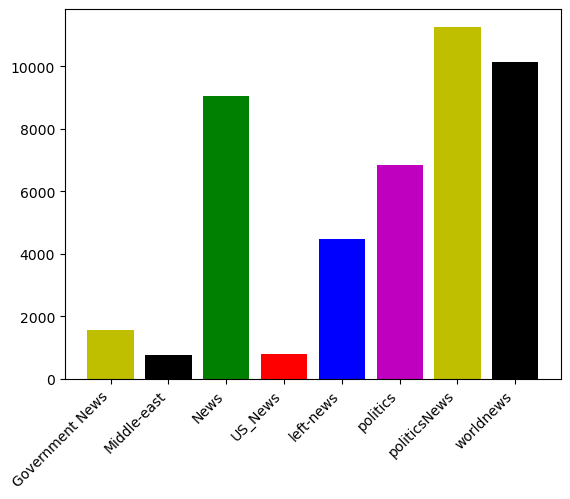

In [20]:
subject=df.groupby("subject")["title"].count()
bars=plt.bar(subject.keys(),subject.values,color=["y","k","g","r","b","m"])
plt.xticks(rotation=45,ha="right")
plt.show()

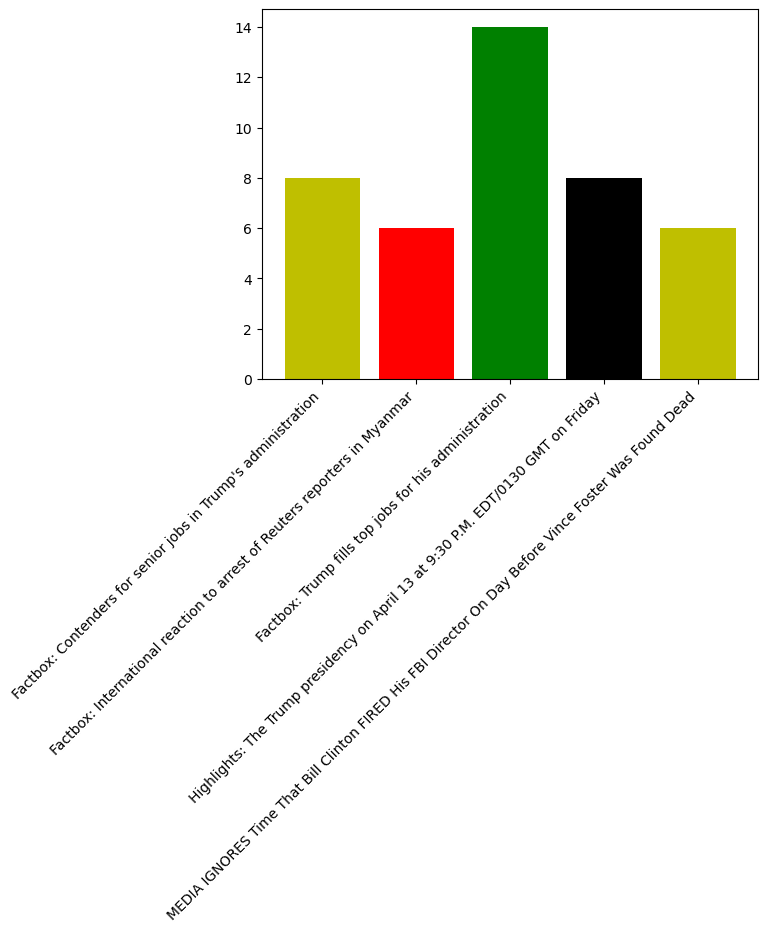

In [21]:
m=df.groupby("title")["text"].count()
p=sorted(m)
p[len(p)-5]
t=m[m.values>p[len(p)-6]]
plt.bar(t.keys(),t.values,color=["y","red","g","k"])
plt.xticks(rotation=45,ha="right")
plt.show()

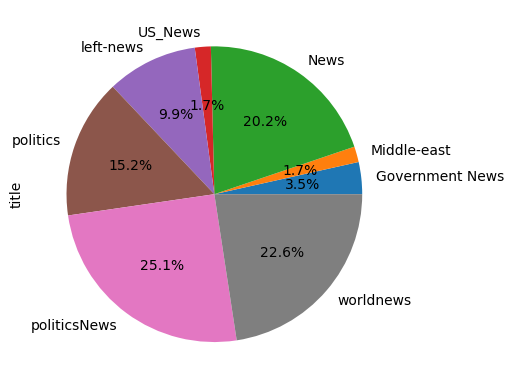

In [22]:
df.groupby("subject")["title"].count().plot.pie(autopct="%1.1f%%")
plt.show()

## Removing columns which are not required

In [23]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [24]:
df.isnull().sum()

text     0
class    0
dtype: int64

## Random Shuffling the dataframe

In [25]:
df = df.sample(frac = 1)

In [26]:
df.head()

,text,class
10308,WASHINGTON (Reuters) - Democratic presidential...,1
11548,https://www.youtube.com/watch?v=hNPX8ZCIfc0&t=26s,0
14925,They were probably just looking for a safe sp...,0
16555,BANGKOK (Reuters) - Crowds began gathering in ...,1
2713,MEXICO CITY (Reuters) - Mexico’s government on...,1


In [27]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [28]:
df.columns

Index(['text', 'class'], dtype='object')

In [29]:
df.head()

,text,class
0,WASHINGTON (Reuters) - Democratic presidential...,1
1,https://www.youtube.com/watch?v=hNPX8ZCIfc0&t=26s,0
2,They were probably just looking for a safe sp...,0
3,BANGKOK (Reuters) - Crowds began gathering in ...,1
4,MEXICO CITY (Reuters) - Mexico’s government on...,1


## Creating a function to process the texts

In [30]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [31]:
df["text"] = df["text"].apply(wordopt)

## Defining dependent and independent variables

In [32]:
x = df["text"]
y = df["class"]

## Splitting Training and Testing

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Convert text to vectors

In [34]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [36]:
pred_lr=LR.predict(xv_test)

In [37]:
LR.score(xv_test, y_test)

0.9872549019607844

In [38]:
print(confusion_matrix(y_test,pred_lr))

[[5783   75]
 [  68 5294]]


In [39]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5858
           1       0.99      0.99      0.99      5362

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Decision Tree Classification

In [40]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [41]:
pred_dt = DT.predict(xv_test)

In [42]:
DT.score(xv_test, y_test)

0.996969696969697

In [43]:
print(confusion_matrix(y_test,pred_lr))

[[5783   75]
 [  68 5294]]


In [44]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5858
           1       1.00      1.00      1.00      5362

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [45]:
print(confusion_matrix(y_test,pred_dt))

[[5848   10]
 [  24 5338]]


## Gradient Boosting Classifier

In [46]:
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

# Fit the model
xgb.fit(xv_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
pred_gbc = xgb.predict(xv_test)

In [48]:
xgb.score(xv_test, y_test)

0.9968805704099821

In [49]:
print(confusion_matrix(y_test,pred_lr))

[[5783   75]
 [  68 5294]]


In [50]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5858
           1       1.00      1.00      1.00      5362

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [52]:
pred_rfc = RFC.predict(xv_test)

In [53]:
RFC.score(xv_test, y_test)

0.9893048128342246

In [54]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5858
           1       0.99      0.99      0.99      5362

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# Cross-validation 

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [56]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

In [57]:
# Perform k-fold cross-validation (e.g., with 5 folds)
k = 5
grid_search=GridSearchCV(rf_classifier,param_grid,cv=5,scoring="accuracy")
grid_search.fit(xv_train,y_train)


In [58]:
# Calculate and print the mean and standard deviation of the scores
pred_rfc = grid_search.predict(xv_test)

In [59]:
grid_search.score(xv_test, y_test)

0.9893048128342246

In [60]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5858
           1       0.99      0.99      0.99      5362

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Model Testing

In [61]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = xgb.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [63]:
news = str(input())
manual_testing(news)

In an era of information abundance, the proliferation of fake news has emerged as a grave concern, influencing public opinion and jeopardizing the integrity of credible journalism. This project addresses this issue through the development of a machine learning-based system for fake news detection. Leveraging a diverse dataset of news articles, this research explores the application of state-of-the-art machine learning algorithms and natural language processing techniques to automatically identify deceptive and misleading content.


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [64]:
news = str(input())
manual_testing(news)

Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, a